# Monte Carlo Simulation and the Black-Scholes Model

In this notebook, we'll explore the relationship between analytical and numerical expectations through Monte Carlo simulation. We'll start with simple examples to build intuition, then apply these concepts to option pricing under the Black-Scholes framework.

We'll demonstrate how Monte Carlo methods can approximate theoretical expectations by:
1. Simulating basic random variables (Bernoulli, exponential) and comparing sample means to known expectations
2. Extending to financial applications by simulating stock price paths
3. Using Monte Carlo to price options and comparing results to Black-Scholes analytical solutions

This will illustrate how numerical methods can validate and complement analytical approaches, particularly for complex financial instruments where closed-form solutions may not exist.



### Analytical Expectation: Definition and Examples

The expectation (or expected value) of a random variable is a key concept in probability theory that represents the long-run average value of repeated samples. The definition differs slightly for discrete and continuous random variables:

### Discrete Random Variables
For a discrete random variable X with probability mass function P(X = x), the expectation is:

$$\mathbb{E}[X] = \sum_{x} x P(X = x)$$

### Example: Bernoulli Distribution
Consider a Bernoulli random variable X representing a single trial with probability p of success:
 
$$P(X = x) = \begin{cases} 
p & \text{if } x = 1 \\
1-p & \text{if } x = 0
\end{cases}$$
 
The expectation is:
 
$$\begin{align*}
\mathbb{E}[X] &= \sum_{x} x P(X = x) \\
&= 1 \cdot p + 0 \cdot (1-p) \\
&= p
\end{align*}$$

### Continuous Random Variables 
For a continuous random variable X with probability density function f(x), the expectation is:

$$\mathbb{E}[X] = \int_{-\infty}^{\infty} x f(x) dx$$

### Example: Exponential Distribution
Consider an exponential random variable X with rate parameter λ and density function:

$$f(x) = \lambda e^{-\lambda x}, x \geq 0$$

The expectation is:

$$\begin{align*}
\mathbb{E}[X] &= \int_{0}^{\infty} x \lambda e^{-\lambda x} dx \\
&= \frac{1}{\lambda}
\end{align*}$$

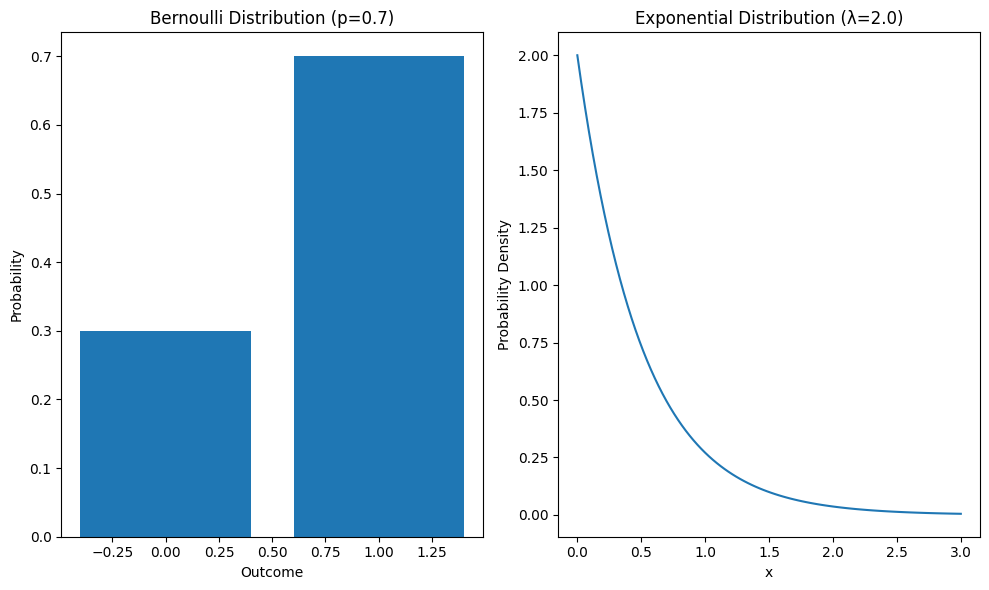


Analytical Expectations:
Bernoulli (p=0.7): E[X] = 0.7000
Exponential (λ=2.0): E[X] = 0.5000


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Set random seed for reproducibility
np.random.seed(42)

# Parameters for our distributions
p_bernoulli = 0.7  # probability of success for Bernoulli
lambda_exp = 2.0   # rate parameter for exponential

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))

# Bernoulli distribution visualization
x_bernoulli = np.array([0, 1])
pmf_bernoulli = np.array([1-p_bernoulli, p_bernoulli])
ax1.bar(x_bernoulli, pmf_bernoulli)
ax1.set_title(f'Bernoulli Distribution (p={p_bernoulli})')
ax1.set_xlabel('Outcome')
ax1.set_ylabel('Probability')

# Exponential distribution visualization
x_exp = np.linspace(0, 3, 100)
pdf_exp = lambda_exp * np.exp(-lambda_exp * x_exp)
ax2.plot(x_exp, pdf_exp)
ax2.set_title(f'Exponential Distribution (λ={lambda_exp})')
ax2.set_xlabel('x')
ax2.set_ylabel('Probability Density')

plt.tight_layout()
plt.show()

# Calculate analytical expectations
bernoulli_expectation = p_bernoulli  # E[X] = p for Bernoulli
exponential_expectation = 1/lambda_exp  # E[X] = 1/λ for Exponential

print("\nAnalytical Expectations:")
print(f"Bernoulli (p={p_bernoulli}): E[X] = {bernoulli_expectation:.4f}")
print(f"Exponential (λ={lambda_exp}): E[X] = {exponential_expectation:.4f}")

### Monte Carlo Simulation: Approximating Expected Values

Monte Carlo simulation is a powerful technique for approximating expected values through repeated random sampling. The basic steps are:

1. Generate a large number of random samples from the probability distribution of interest
2. Calculate the quantity of interest for each sample 
3. Take the average across all samples to approximate the expected value

The accuracy of the approximation improves with more samples, following the Law of Large Numbers. As the number of samples increases, the sample average converges to the true expected value.

Key considerations:
- Choose a sufficiently large sample size (typically 10,000+ samples)
- Use appropriate random number generation for your distribution
- Consider variance reduction techniques for better efficiency
- Validate results against analytical solutions when possible

The code examples that follow demonstrate Monte Carlo simulation for both discrete (Bernoulli) and continuous (Exponential) distributions, showing how the empirical means converge to the theoretical expectations.


In [7]:
# Naive Monte Carlo implementation using for loops
n_samples = 100000

# Bernoulli naive Monte Carlo
bernoulli_sum = 0
for i in range(n_samples):
    # Generate random number between 0 and 1
    u = np.random.random()
    # If u < p, count as success (1), else failure (0)
    bernoulli_sum += 1 if u < p_bernoulli else 0
bernoulli_naive_mean = bernoulli_sum / n_samples

# Exponential naive Monte Carlo
exponential_sum = 0
for i in range(n_samples):
    # Generate random number between 0 and 1
    u = np.random.random()
    # Inverse transform sampling: F^(-1)(u) = -ln(1-u)/λ
    exponential_sum += -np.log(1-u)/lambda_exp
exponential_naive_mean = exponential_sum / n_samples

print("\nNaive Monte Carlo Results (n =", n_samples, "):")
print(f"Bernoulli naive MC mean: {bernoulli_naive_mean:.4f} (vs analytical {bernoulli_expectation:.4f})")
print(f"Exponential naive MC mean: {exponential_naive_mean:.4f} (vs analytical {exponential_expectation:.4f})")



Naive Monte Carlo Results (n = 100000 ):
Bernoulli naive MC mean: 0.7011 (vs analytical 0.7000)
Exponential naive MC mean: 0.5023 (vs analytical 0.5000)


## Connecting Analytical Expectations to Monte Carlo Simulations

The relationship between analytical expectations and Monte Carlo simulation is fundamentally based on the Law of Large Numbers (LLN). When we repeatedly sample from a probability distribution and compute the empirical average, we are effectively implementing the LLN, which states that this sample mean converges almost surely to the theoretical expectation:

For a sequence of independent, identically distributed random variables $X_1, X_2, ..., X_n$ with mean $\mu = \mathbb{E}[X]$:

$$\frac{1}{n}\sum_{i=1}^n X_i \xrightarrow{a.s.} \mathbb{E}[X] \text{ as } n \to \infty$$

This powerful connection means that for any random variable where we can:
1. Calculate its analytical expectation through mathematical derivation
2. Generate samples from its distribution

We can verify our analytical results through Monte Carlo simulation, or approximate expectations when analytical solutions are intractable. The larger our sample size, the closer our empirical average will be to the true theoretical expectation.

The Law of Large Numbers (LLN) tells us that we can approximate expectations by sampling from any
probability distribution (e.g., coin flips, dice rolls, waiting times, or asset price paths) and
taking the average of the realized samples. As the sample size grows larger, this empirical average
converges almost surely to the true theoretical expectation. This powerful result lets us estimate
expectations through simulation when analytical solutions are difficult to compute.

## Example: Geometric Distribution

Let's consider a geometric random variable $X$ which models the number of trials until the first success,
with probability of success $p$ on each trial. The PMF is:

 $$P(X = k) = \begin{cases}
     p(1-p)^{k-1} & \text{if } k = 1,2,3,... \\
     0 & \text{otherwise}
 \end{cases}$$

The analytical expectation can be calculated using the definition:

$$\mathbb{E}[X] = \sum_{k=1}^{\infty} k \cdot p(1-p)^{k-1}$$
$$= p \sum_{k=1}^{\infty} k(1-p)^{k-1}$$
$$= p \cdot \frac{d}{dx}\left(\sum_{k=0}^{\infty} x^k\right)\bigg|_{x=1-p}$$
$$\text{Using the geometric series formula: } \sum_{k=0}^{\infty} x^k = \frac{1}{1-x} \text{ for } |x| < 1$$
$$= p \cdot \frac{d}{dx}\left(\frac{1}{1-x}\right)\bigg|_{x=1-p}$$
$$= p \cdot \frac{1}{(1-x)^2}\bigg|_{x=1-p}$$
$$= p \cdot \frac{1}{(1-(1-p))^2}$$
$$= p \cdot \frac{1}{p^2}$$
$$= \frac{1}{p}$$

We can verify this using Monte Carlo simulation by generating samples from the geometric distribution
and comparing their average to the analytical result. This demonstrates how the Law of Large Numbers
allows us to approximate expectations through simulation, even for discrete distributions.

## Geometric Random Variable Example: Rolling a Die Until Getting a 6
 
Let's consider a geometric random variable $X$ representing the number of rolls until we get a 6 on a fair die.
The probability mass function (PMF) for this geometric distribution is:
 
 $$P(X = k) = \begin{cases}
     \frac{1}{6}(\frac{5}{6})^{k-1} & \text{if } k = 1,2,3,... \\
     0 & \text{otherwise}
 \end{cases}$$

### Analytical Expectation
 
For a geometric distribution with probability of success $p = \frac{1}{6}$, the expected number of rolls is:
 
$$\mathbb{E}[X] = \frac{1}{p} = \frac{1}{1/6} = 6$$

### Monte Carlo Simulation

We can verify this expectation through simulation, demonstrating the power of the Law of Large Numbers.
This same approach extends beyond simple dice rolls to any stochastic process, including:

- Complex asset price paths
- Multi-dimensional stochastic processes
- Hybrid scenarios combining different distributions

For example, in financial applications, we might be interested in simulating:
1. The number of trading days until a stock hits a target price (geometric distribution)
2. The actual price path the stock takes (geometric Brownian motion)

Monte Carlo methods excel at handling such combinations of distributions, making them invaluable
for complex financial modeling and risk assessment.



Analytical expectation: 6.0000

Monte Carlo approximations:
n=100: 6.3900
n=1000: 6.0260
n=10000: 6.0170
n=100000: 6.0099


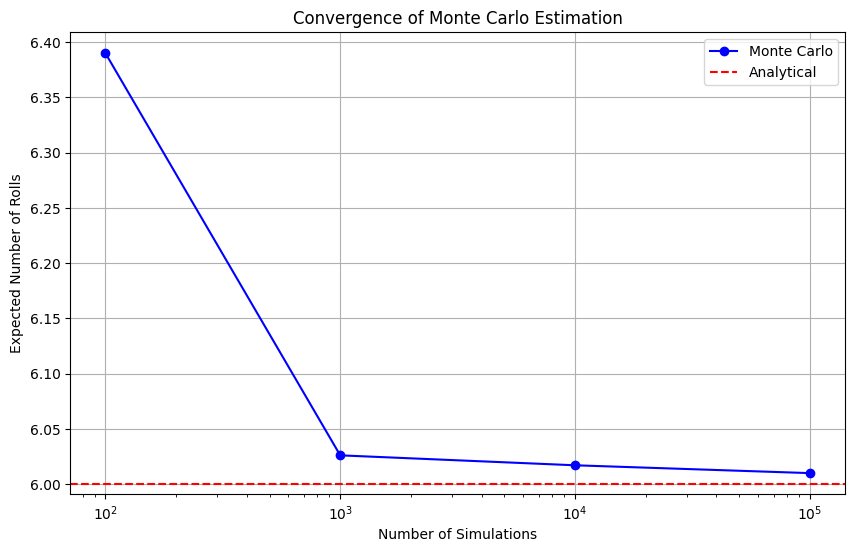

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def analytical_expectation_dice():
    """Analytical expectation for number of rolls until first 6"""
    p = 1/6  # Probability of rolling a 6
    return 1/p  # Expected value for geometric distribution

def simulate_until_six():
    """Simulate rolling a die until getting a 6"""
    rolls = 1
    while np.random.randint(1, 7) != 6:
        rolls += 1
    return rolls

def monte_carlo_expectation(n_samples):
    """Monte Carlo simulation of expected rolls until first 6"""
    samples = [simulate_until_six() for _ in range(n_samples)]
    return np.mean(samples)

# Compare analytical vs Monte Carlo results
n_samples = [100, 1000, 10000, 100000]
mc_results = [monte_carlo_expectation(n) for n in n_samples]

print(f"Analytical expectation: {analytical_expectation_dice():.4f}")
print("\nMonte Carlo approximations:")
for n, result in zip(n_samples, mc_results):
    print(f"n={n}: {result:.4f}")

# Plot convergence
plt.figure(figsize=(10, 6))
plt.semilogx(n_samples, mc_results, 'bo-', label='Monte Carlo')
plt.axhline(y=analytical_expectation_dice(), color='r', linestyle='--', label='Analytical')
plt.xlabel('Number of Simulations')
plt.ylabel('Expected Number of Rolls')
plt.title('Convergence of Monte Carlo Estimation')
plt.legend()
plt.grid(True)
plt.show()

## Option Pricing

The Black-Scholes model assumes that the stock price follows a geometric Brownian motion:

$$dS_t = rS_tdt + \sigma S_tdW_t$$

where:
- $S_t$ is the stock price at time $t$
- $r$ is the risk-free rate
- $\sigma$ is the volatility
- $W_t$ is a standard Brownian motion

### Risk-Neutral Pricing

The fundamental theorem of asset pricing states that in the absence of arbitrage, there exists a risk-neutral measure $\mathbb{Q}$ under which the discounted price process is a martingale. For a European call option with strike $K$ and maturity $T$, the price is:

$$C(S_0, K, T) = e^{-rT}\mathbb{E}^\mathbb{Q}[\max(S_T - K, 0)]$$

### Analytical Solution: Black-Scholes Formula (Hedge Portfolio Argument):

1. Consider a portfolio Π consisting of:
    - Long one call option V(S,t)
    - Short Δ shares of stock

2. The value of this portfolio is:
    $$\Pi = V - \Delta S$$

3. The change in portfolio value over dt is:
    $$d\Pi = dV - \Delta dS$$

4. Using Itô's lemma, the change in option value is:
    $$dV = \frac{\partial V}{\partial t}dt + \frac{\partial V}{\partial S}dS + \frac{1}{2}\frac{\partial^2 V}{\partial S^2}(dS)^2$$

5. Substituting $dS = rSdt + \sigma SdW$ and $(dS)^2 = \sigma^2S^2dt$:
    $$d\Pi = (\frac{\partial V}{\partial t} + \frac{1}{2}\sigma^2S^2\frac{\partial^2 V}{\partial S^2})dt + (\frac{\partial V}{\partial S} - \Delta)dS$$

6. Choose $\Delta = \frac{\partial V}{\partial S}$ to eliminate risk (delta-hedging)

7. No-arbitrage implies the portfolio must earn the risk-free rate:
    $$d\Pi = r\Pi dt$$

8. This yields the Black-Scholes PDE:
   $$\frac{\partial V}{\partial t} + rS\frac{\partial V}{\partial S} + \frac{1}{2}\sigma^2S^2\frac{\partial^2 V}{\partial S^2} = rV$$

9. Solving this PDE with boundary condition $V(S,T) = \max(S-K,0)$ gives:

$$C(S_0, K, T) = S_0\Phi(d_1) - Ke^{-rT}\Phi(d_2)$$

where:
$$d_1 = \frac{\ln(S_0/K) + (r + \sigma^2/2)T}{\sigma\sqrt{T}}$$
$$d_2 = d_1 - \sigma\sqrt{T}$$
and $\Phi$ is the standard normal CDF.

### Monte Carlo Simulation Approach

Rather than solving the PDE, we can price options using Monte Carlo simulation by directly approximating the risk-neutral expectation:

$$C(S_0, K, T) = e^{-rT}\mathbb{E}^\mathbb{Q}[\max(S_T - K, 0)]$$

Under the risk-neutral measure, the terminal stock price $S_T$ follows a lognormal distribution:

$$S_T = S_0\exp((r-\frac{1}{2}\sigma^2)T + \sigma\sqrt{T}Z)$$

where $Z \sim N(0,1)$ is a standard normal random variable.

The Monte Carlo method involves:
1. Generate n independent draws $Z_i \sim N(0,1)$
2. Calculate terminal prices $S_T^i$ using the formula above
3. Calculate option payoffs $\max(S_T^i - K, 0)$
4. Average and discount: $\frac{e^{-rT}}{n}\sum_{i=1}^n \max(S_T^i - K, 0)$

By the Law of Large Numbers, as n → ∞:

$$\frac{1}{n}\sum_{i=1}^n \max(S_T^i - K, 0) \xrightarrow{a.s.} \mathbb{E}^\mathbb{Q}[\max(S_T - K, 0)]$$

So the Monte Carlo estimate converges almost surely to the true option price.

# Analytical Black-Scholes Pricing

In [13]:
def black_scholes_call(S0, K, T, r, sigma):
    """Analytical Black-Scholes call option price"""
    d1 = (np.log(S0/K) + (r + sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    return S0*norm.cdf(d1) - K*np.exp(-r*T)*norm.cdf(d2)

# Create interactive plot
from ipywidgets import interactive
import ipywidgets as widgets

def plot_bs_price(S0, K, T, r, sigma):
    # Calculate option price
    price = black_scholes_call(S0, K, T, r, sigma)
    
    # Create figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6), facecolor='white')
    plt.style.use('default')
    
    # Left subplot - Option price curve
    S_range = np.linspace(max(0, S0-50), S0+50, 200)
    prices = [black_scholes_call(s, K, T, r, sigma) for s in S_range]
    
    ax1.plot(S_range, prices, color='#2E86C1', linewidth=2, label='Option Price Curve')
    ax1.scatter(S0, price, color='#E74C3C', s=100, zorder=5, label='Current Price')
    
    ax1.set_xlabel('Underlying Price ($)', fontsize=12)
    ax1.set_ylabel('Option Price ($)', fontsize=12)
    ax1.set_title('Black-Scholes Call Option Price', fontsize=14, pad=15)
    ax1.grid(True, alpha=0.3)
    ax1.legend(fontsize=10)
    
    # Add text box with parameters
    param_text = f'Parameters:\nStrike (K): ${K:.2f}\nMaturity (T): {T:.1f}y\nRate (r): {r:.1%}\nVol (σ): {sigma:.1%}'
    ax1.text(0.02, 0.98, param_text, transform=ax1.transAxes, 
             verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    # Right subplot - Terminal price distribution
    n_samples = 10000
    Z = np.random.standard_normal(n_samples)
    ST = S0 * np.exp((r - 0.5*sigma**2)*T + sigma*np.sqrt(T)*Z)
    
    ax2.hist(ST, bins=50, density=True, alpha=0.7, color='#2E86C1')
    ax2.axvline(x=S0, color='#E74C3C', linestyle='--', label='Current Price')
    ax2.axvline(x=K, color='green', linestyle='--', label='Strike Price')
    
    ax2.set_xlabel('Terminal Stock Price ($)', fontsize=12)
    ax2.set_ylabel('Density', fontsize=12)
    ax2.set_title('Terminal Price Distribution', fontsize=14, pad=15)
    ax2.grid(True, alpha=0.3)
    ax2.legend(fontsize=10)
    
    plt.tight_layout()
    plt.show()
    
    print(f"Option price for S0=${S0:.2f}: ${price:.4f}")

# Create interactive sliders
interactive_plot = interactive(
    plot_bs_price,
    S0=widgets.FloatSlider(
        value=100,
        min=50,
        max=150,
        step=1,
        description='Stock Price ($):',
        continuous_update=False,
        style={'description_width': 'initial'}
    ),
    K=widgets.FloatSlider(
        value=100,
        min=50,
        max=150,
        step=1,
        description='Strike Price ($):',
        continuous_update=False,
        style={'description_width': 'initial'}
    ),
    T=widgets.FloatSlider(
        value=1,
        min=0.1,
        max=3,
        step=0.1,
        description='Time to Maturity (years):',
        continuous_update=False,
        style={'description_width': 'initial'}
    ),
    r=widgets.FloatSlider(
        value=0.05,
        min=0,
        max=0.2,
        step=0.01,
        description='Risk-free Rate:',
        continuous_update=False,
        style={'description_width': 'initial'}
    ),
    sigma=widgets.FloatSlider(
        value=0.2,
        min=0.05,
        max=0.5,
        step=0.05,
        description='Volatility:',
        continuous_update=False,
        style={'description_width': 'initial'}
    )
)

display(interactive_plot)

interactive(children=(FloatSlider(value=100.0, continuous_update=False, description='Stock Price ($):', max=15…

# Monte Carlo Pricing

Let's visualize how the Monte Carlo estimate converges to the analytical price as we increase the number of simulations:

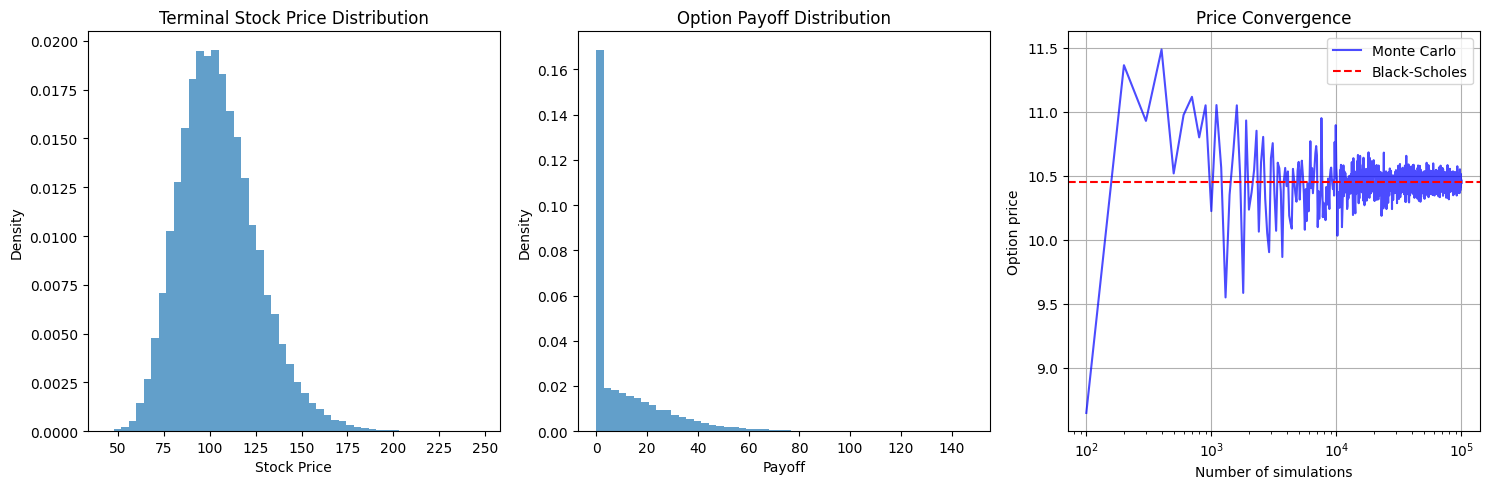

In [23]:
# Generate terminal stock prices and payoffs
n_simulations = 100000
S0, K, T, r, sigma = 100, 100, 1, 0.05, 0.2  # Parameters from interactive widgets
Z = np.random.standard_normal(n_simulations)
ST = S0 * np.exp((r - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * Z)
payoffs = np.maximum(ST - K, 0)
mc_price = np.exp(-r * T) * np.mean(payoffs)
bs_price = black_scholes_call(S0, K, T, r, sigma)

# Create subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# Plot 1: Terminal price distribution
ax1.hist(ST, bins=50, density=True, alpha=0.7)
ax1.set_title('Terminal Stock Price Distribution')
ax1.set_xlabel('Stock Price')
ax1.set_ylabel('Density')

# Plot 2: Payoff distribution
ax2.hist(payoffs, bins=50, density=True, alpha=0.7)
ax2.set_title('Option Payoff Distribution')
ax2.set_xlabel('Payoff')
ax2.set_ylabel('Density')

# Plot 3: Convergence analysis
n_steps = 10000  # Number of points to plot
step_size = 100  # Increment by 100 simulations each time
n_simulations_list = np.arange(100, 100000, step_size)
mc_prices = []

for n in n_simulations_list:
    Z = np.random.standard_normal(n)
    ST = S0 * np.exp((r - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * Z)
    payoffs = np.maximum(ST - K, 0)
    mc_prices.append(np.exp(-r * T) * np.mean(payoffs))

ax3.semilogx(n_simulations_list, mc_prices, 'b-', alpha=0.7, label='Monte Carlo')
ax3.axhline(y=bs_price, color='r', linestyle='--', label='Black-Scholes')
ax3.set_xlabel('Number of simulations')
ax3.set_ylabel('Option price')
ax3.set_title('Price Convergence')
ax3.legend()
ax3.grid(True)

plt.tight_layout()
plt.show()

In [25]:
mc_price = np.exp(-r * T) * np.mean(payoffs)
bs_price = black_scholes_call(S0, K, T, r, sigma)
mc_price, bs_price

(np.float64(10.443623212597547), np.float64(10.450583572185565))

# Closing Thoughts: Analytical vs Numerical Methods and Modern Approaches

The comparison between analytical and numerical methods (like Monte Carlo simulation) highlights important tradeoffs:

Analytical Solutions:
- Provide exact results instantly once derived
- Offer clear mathematical insights into relationships between variables
- Are computationally efficient for repeated calculations
- But may be impossible to derive for complex problems

Monte Carlo Methods:
- Can handle virtually any probability distribution we can sample from
- Scale well to high-dimensional problems
- Provide error estimates through confidence intervals
- But require significant computational resources for high accuracy
- Convergence can be slow (typically O(1/√n))

Modern AI/ML Approaches:
Recent research has explored using neural networks to learn from Monte Carlo simulations:
- Networks can be trained on MC simulation data to approximate complex expectations
- Once trained, they provide near-instant approximations
- Can generalize across different parameter values
- Particularly valuable when analytical solutions don't exist but MC is too slow for real-time use

This creates a powerful workflow where:
1. MC simulation generates training data
2. Neural networks learn to approximate the solution
3. The trained network provides fast approximate solutions

This hybrid approach combines the flexibility of MC simulation with the speed of analytical solutions, opening new possibilities for complex financial modeling.
